### numpy 基础操作


使用 numpy 创建多维数组


In [3]:
import numpy as np

mul = np.array([[1, 2, 3], [4, 5, 6]])
# 打印大小
print(mul.shape)
# 获取某一个位置上的数字
print(mul[0])
print(mul[0, 2])

(2, 3)
[1 2 3]
3


查看数组的最大维度


In [8]:
mul = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])
print(mul.shape)
print(mul.ndim)  # 返回最大维度
print(mul.size)  # 返回数字个数 2x2x3=12
print(mul.dtype)  # 返回元素的类型

(2, 2, 3)
3
12
int64


In [12]:
a = np.array([[1, 2, 3], [4, "hello", 5], [7, 8, 9]])
print(a.dtype)  # <U21 -> 字符串数 <= 21
print(type(a[0, 0]))  # 由于 "hello" 的存在，全部被转化为: str
print(a[0, 0].dtype)

<U21
<class 'numpy.str_'>
<U1


使用 numpy 创建数组可以指定数组的类型，numpy 会尝试自动转化


In [ ]:
a = np.array(
    [[1, 2, 3], [4, "32", 5], [7, 8, 9]], dtype=np.int32
)  # "32" 可以被转化为数字
print(a.dtype)
print(a[1, 1].dtype)
print(a[1, 1])

int32
int32
32


In [29]:
mul = np.array([[1, 2, 3], [4, 5, 6]], dtype="<U1")
print(mul.dtype)

<U1


太离谱的不行~


In [15]:
a = np.array([[1, 2, 3], [4, "hello", 5], [7, 8, 9]], dtype=np.float32)
# print(a.dtype)
# print(a[1, 1].dtype)

ValueError: could not convert string to float: 'hello'

如果 np.array 中的数据类型过于复杂 -> 包括了字典,集合等数据类型。由于 numpy 背后底层的 C 语言无法解析，所以整个 array 中的元素退回到了最原始的 python object 中，这就导致 numpy 一些方法不再可用。尽管 `type(a) == <class 'numpy.ndarray'>`


In [24]:
# 这个情况下我们可以对 np.int64 使用 dtype
a = np.array([[1, 2, 3], [4, 5, 6]])
print(type(a[0, 1]))
print(a[0, 1].dtype)

<class 'numpy.int64'>
int64


In [27]:
# 使用方法报错
d = {"name": "Landon"}
a = np.array([[1, 2, 3], [4, d, 6]])
print(a.dtype)  # 为 object 而不是 numpy 中的数据类型
print(type(a))
print(type(a[0, 1]))
print(a[0, 1].dtype)  # 由于为基础的 int 类型，故使用 np 的方法报错

object
<class 'numpy.ndarray'>
<class 'int'>


AttributeError: 'int' object has no attribute 'dtype'

### numpy 快速创建数组


In [31]:
# 一个 2x3x4 的矩阵，全用 9 填充

a = np.full((2, 3, 4), 9)
print(a)

[[[9 9 9 9]
  [9 9 9 9]
  [9 9 9 9]]

 [[9 9 9 9]
  [9 9 9 9]
  [9 9 9 9]]]


In [33]:
a = np.zeros((2, 5, 2))
b = np.ones((2, 5, 2))
print(a)
print(b)

[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
[[[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]
  [1. 1.]]]


In [34]:
x_value = np.arange(0, 10, 0.5)  # 创建一个 range 数组
print(x_value)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


In [35]:
x_value = np.linspace(0, 10, 3)
x_value  # 10 / (3-1) 作为步长

array([ 0.,  5., 10.])

### 特殊字符

`nan` 表示缺失值; `inf` 表示无限大


In [38]:
print(np.nan)
print(np.inf)

nan
inf


In [41]:
# 判断是否为特殊值
print(np.isnan(np.nan))
print(np.isnan(np.sqrt(-1)))
print(np.isinf(np.array([10]) / 0))

True
True
[ True]


/tmp/ipython-input-1845142053.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.isnan(np.sqrt(-1)))
/tmp/ipython-input-1845142053.py:4: RuntimeWarning: divide by zero encountered in divide
  print(np.isinf(np.array([10]) / 0))


### 使用 numpy 进行数学运算


In [42]:
a = [1, 2, 3]
b = [1, 2, 3]
print(np.dot(a, b))

14


其实使用 numpy 进行数学运算和 matlab 基本是差不多的逻辑，所以我在这儿不再赘述了，问 AI 基本能解决 99% 的问题，用法和 matlab 基本一致


### np.array 操作


In [52]:
a = np.array([1, 2, 3])
# 追加元素
print(np.append(a, [7, 8, 9]))
print(a)  # 不会直接在原变量上进行改变

[1 2 3 7 8 9]
[1 2 3]


In [53]:
# 插入元素到指定位置
a = np.insert(a, 3, [4, 5, 6])
print(a)

[1 2 3 4 5 6]


从 np.array 中删除元素
由于删除元素之后，矩阵往往不再保持原形，故 numpy 会直接将数据降为 1 维


In [54]:
# 从指定位置删除元素
a = np.array([[1, 2, 3], [4, 5, 6]])
# np.array 的索引排序方式是从左到右，从上到下
print(np.delete(a, 1))  # 不指定 axis 的话是删除单个元素

[1 3 4 5 6]


In [56]:
# 从指定axis删除元素
a = np.array([[1, 2, 3], [4, 5, 6]])
print(np.delete(a, 1, 0))  # axis = 0 表示行
print(np.delete(a, 1, 1))  # axis = 1 表示列

[[1 2 3]]
[[1 3]
 [4 6]]


### 重构 np.arrray 的结构


In [ ]:
import numpy as np

a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(a.shape)
print(a.reshape(5, 2))  # 按行重新排列
print(a.reshape(5, -1))  # -1 设置自适应值

(2, 5)
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [66]:
# 如果你希望 reshape 的结果立马传入 a 变量中，需要使用 resize
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
a.resize(5, 2)
print(a)  # 立刻发生改变

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


将高维数组展平：

1. `faltten()` 返回数组的 copy 形式（修改不影响原数组）
2. `ravel()` 返回原数组的快照（修改影响原数组）


In [ ]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(a.flatten())
var1 = a.flatten()  # 返回副本，不影响原数组
var1[1] = 99
print(a)
print(var1)

[ 1  2  3  4  5  6  7  8  9 10]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[ 1 99  3  4  5  6  7  8  9 10]


In [ ]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
var2 = a.ravel()  # 返回快照，直接影响原数组
print(var2)
var2[1] = 99
print(var2)
print(a)  # 原数组也发生了变化

[ 1  2  3  4  5  6  7  8  9 10]
[ 1 99  3  4  5  6  7  8  9 10]
[[ 1 99  3  4  5]
 [ 6  7  8  9 10]]


### 矩阵变换


In [72]:
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(a)
a.T  # a.transpose()

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [73]:
# 可以使用 swapaxes 函数交换指定两个轴的数组
a = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
a.swapaxes(0, 1)  # 这里和转置的效果一样

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

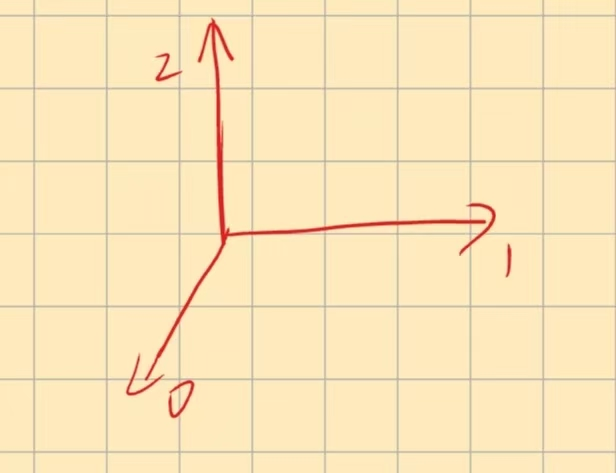


In [ ]:
a = np.array([[[1, 2, 3], [4, 5, 6]], [[11, 22, 33], [44, 55, 66]]])
print(a, end="\n" + "*" * 20 + "\n")
print(a.swapaxes(0, 2))  # 行方向为 0, 列方向为 1, 垂直方向为 2

[[[ 1  2  3]
  [ 4  5  6]]

 [[11 22 33]
  [44 55 66]]]
********************
[[[ 1 11]
  [ 4 44]]

 [[ 2 22]
  [ 5 55]]

 [[ 3 33]
  [ 6 66]]]


### 数组拼接

拼接输入的两个数组都需要用元组表示


In [83]:
a1 = np.array([[1, 2, 3], [4, 5, 6]])
a2 = np.array([[7, 8, 9], [10, 11, 12]])
a = np.concatenate((a1, a2), axis=0)
print(a)  # 按行拼接
a = np.concatenate((a1, a2), axis=1)
print(a)  # 按列拼接

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


我们可以将两个二维数组“堆叠起来”获得三维数组

即为 batch_size


In [89]:
a1 = np.array([[1, 2, 3], [4, 5, 6]])
a2 = np.array([[7, 8, 9], [10, 11, 12]])
a = np.stack((a1, a2))
print(a)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


### 数组拆分


In [93]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print(np.split(a, 2, axis=0))
print(np.split(a, 3, axis=1))

[array([[1, 2, 3],
       [4, 5, 6]]), array([[ 7,  8,  9],
       [10, 11, 12]])]
[array([[ 1],
       [ 4],
       [ 7],
       [10]]), array([[ 2],
       [ 5],
       [ 8],
       [11]]), array([[ 3],
       [ 6],
       [ 9],
       [12]])]


### 基础运算函数


In [18]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# 计算一些统计信息
print(a.min())
print(a.max())
print(a.mean())
print(a.std())  # 标准差
print(a.var())  # 方差
print(a.sum())
print(np.median(a))

1
12
6.5
3.452052529534663
11.916666666666666
78
6.5


### `np.random` 使用


In [8]:
# random 函数生成范围在 0-1 之间的数
a = np.random.random((2, 3))
print(a)

[[0.38788665 0.66289549 0.2034663 ]
 [0.42163403 0.82536849 0.33539166]]


In [16]:
number = np.random.randint(0, 10, size=(2, 3))  # 指定生成形状
print(number)

[[7 4 1]
 [7 1 9]]


In [10]:
# 生成符合正态分布的数字
number = np.random.normal(loc=170, scale=15, size=(5, 10))
print(number)
print("*" * 5)
print(number.flatten())

[[194.34137332 146.88139743 171.77100884 164.41105833 172.17104592
  190.11004086 173.71501715 175.12851568 163.59361895 186.99397524]
 [169.34806589 183.51750642 161.10461726 174.62558315 150.84525552
  155.28333203 182.70603468 175.97523944 160.10506152 190.50524547]
 [155.47889261 179.16485147 181.79064662 173.22189015 148.432766
  188.2849671  163.25632903 171.95336503 192.46157139 162.09062566]
 [182.34940284 185.79878218 148.31215906 167.71968485 189.42780386
  187.22324873 165.61084069 175.28502076 176.62609367 166.163635  ]
 [157.03302913 188.75836734 177.79615301 171.48518341 179.97337633
  174.09471118 162.00848455 157.9935613  177.56739459 153.44535403]]
*****
[194.34137332 146.88139743 171.77100884 164.41105833 172.17104592
 190.11004086 173.71501715 175.12851568 163.59361895 186.99397524
 169.34806589 183.51750642 161.10461726 174.62558315 150.84525552
 155.28333203 182.70603468 175.97523944 160.10506152 190.50524547
 155.47889261 179.16485147 181.79064662 173.22189015 148

In [20]:
# 从选项中选出想要的形状
number = np.random.choice([10, 20, 30, 40], size=(2, 3))
print(number)

[[40 30 10]
 [40 10 10]]


### 保存和导出数组


In [ ]:
# 使用 .npy 文件
np.save("number.npy", a)

In [4]:
a = np.load("number.npy")
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# 保存为 csv 文件
np.savetxt("number.csv", a, delimiter=",")

In [ ]:
a = np.loadtxt("number.csv", delimiter=",")
print(a)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


### 高级索引


In [1]:
import numpy as np

a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# 指定拥有步长的索引
print(a[0:9:2])  # 起始索引:结束索引:步长

[1 3 5 7 9]


In [ ]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 对于高纬矩阵使用 [] 获得行切片
print(a[0])  # 此种方式获得一行，但是降维数据
print("-" * 10)
print(a[[0]])  # 获得行并保存维度 (外层)
print("-" * 10)
print("-" * 10)
print(a[[0, 1], :])
print("-" * 10)
print(a[:, [0, 1]])  # 获得全部行数据，选取特定几列
print("-" * 10)
print(a[[0, 1], [1, 2]])  # (0, 1) | (1, 2)


[1 2 3]
----------
[[1 2 3]]
----------
----------
[[1 2 3]
 [4 5 6]]
----------
[[1 2]
 [4 5]
 [7 8]]
----------
[2 6]


**np.newaxis** 可以将一维数据化为多维数据：

- 1 -> 2
- 2 -> 3

np.newaxis 放在前面转化为行多维，放在后面转化为列多维

_本质是在放入的位置将维度大小设置为 1_


In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(a[0, :])
print(a[np.newaxis, 0, :])  # 转化为行多维 (3,) -> (1, 3)
print(a[:, 0])
print(a[:, 0, np.newaxis])  # (3, ) -> (3, 1)

[1 2 3]
[[1 2 3]]
[1 4 7]
[[1]
 [4]
 [7]]


In [71]:
a

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

In [73]:
b = a[np.newaxis, [0, 1], :]
print(b)  # 变三维数组
b.shape

[[[ 0  1  4  9]
  [16 25 36 49]]]


(1, 2, 4)

In [ ]:
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3]])
print(a.shape)
print(b.shape)  # 变成了二维矩阵

(3,)
(1, 3)


**布尔索引**


In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 通过 bool 值确定行是否保存
print(a[[True, False, True], :])
print(a[[True, False, True], [True, False, True]])  # 返回 0 行 0 列和 2 行 2 列的数据

# 通过 bool 值确定每一个值是否保留
print(a[[[True, True, True], [True, False, True], [True, True, True]]])

[[1 2 3]
 [7 8 9]]
[1 9]
[1 2 3 4 6 7 8 9]


### 矩阵排序


In [ ]:
a = np.array([[5, 9, 8], [4, 1, 6], [7, 3, 2]])

# a.sort 直接在原矩阵上排序
# 按行排序(默认)
print(np.sort(a, axis=1))
print(a)  # 没有改变

print("-" * 10)
a.sort(axis=1)
print(a)  # 直接改变

[[5 8 9]
 [1 4 6]
 [2 3 7]]
[[5 9 8]
 [4 1 6]
 [7 3 2]]
----------
[[5 8 9]
 [1 4 6]
 [2 3 7]]


### 搜索


In [ ]:
outputs = np.array([0.1, 0.05, 0.85, 0.12])
# 找到最大元素的索引
print(np.argmax(outputs))
# 找到最小元素的索引
print(np.argmin(outputs))
# 找到非0元素
print(np.nonzero(outputs))
# 主动设置搜索条件
print(
    np.where(outputs > 0.1, outputs, outputs * 10)
)  # 条件, 满足条件返回值, 不满足返回值

2
1
(array([0, 1, 2, 3]),)
[1.   0.5  0.85 0.12]


### 迭代

如果我们想遍历一个矩阵，往往会面临维度不一样，需要写的循环层数也不一样的问题，所以 numpy 提供了 nditer 来迭代每个元素


In [ ]:
a = np.arange(24).reshape(3, 4, 2)

# 如果我们想按照行顺序("C")迭代每一个值，我们可以直接使用 np.nditer
for element in np.nditer(a):
    print(element, end=" ")

print()
# 按照列顺序迭代每一个值
a = np.arange(12).reshape(3, 4)
print(a)
for element in np.nditer(a, order="F"):
    print(element, end=" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
0 4 8 1 5 9 2 6 10 3 7 11 

如果希望在迭代的时候对原数值进行修改，需要首先在遍历的时候设置 `op_flag` ，然后通过 `[...]` 来标记直接在原内存位置进行修改


In [ ]:
# 按照列顺序迭代每一个值
a = np.arange(12).reshape(3, 4)
print(a)

# 拥有读取和修改权限
with np.nditer(a, op_flags=["readwrite"]) as it:
    for element in it:
        # 使用 ... 来标记在原位置修改
        element[...] = element**2

print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]]


### masking

将一些值标记为不需要被处理(但是不被删除)


In [80]:
import numpy.ma as ma

a = np.array([1, 2, 3, 4, 5])
b = ma.masked_array(a, mask=[0, 0, 1, 0, 1])
print(b)
print(b.sum())
a = np.array([[1, 2, 3], [4, 5, 6]])
b = ma.masked_array(a, mask=[[0, 0, 0], [1, 0, 0]])
print(b)
print(b.sum())

[1 2 -- 4 --]
7
[[1 2 3]
 [-- 5 6]]
17


还有一些更简便的方法不用给值一个一个设置是否演码


In [87]:
a = np.array([[1, 2, 3], [4, 5, 6]])

print(ma.masked_greater(a, 4), end="\n" + "*" * 10 + "\n")  # 将大于4的进行掩码
print(ma.masked_inside(a, 2, 5), end="\n" + "*" * 10 + "\n")  # 在 2-5 范围内的掩码
print(ma.masked_outside(a, 2, 5), end="\n" + "*" * 10 + "\n")  # 不在 2-5 范围内的掩码

# 自定义掩码规则
print(ma.masked_where(a % 2 == 0, a), end="\n" + "*" * 10 + "\n")  # 遮住所有偶数

a = np.array([1, 2, np.inf, 3, 4, np.nan])
# 掩码无意义数据
print(ma.masked_invalid(a), end="\n" + "*" * 10 + "\n")

[[1 2 3]
 [4 -- --]]
**********
[[1 -- --]
 [-- -- 6]]
**********
[[-- 2 3]
 [4 5 --]]
**********
[[1 -- 3]
 [-- 5 --]]
**********
[1.0 2.0 -- 3.0 4.0 --]
**********


### 视图与副本

python 中 list 切片得到的将是一个副本，而不是一个视图。这意味着修改切片后的结果不会影响原数组。

但 numpy 中的切片返回的是一个 视图，如果要用副本，需要显性指定：`.copy()`

- 使用切片得到的总是：**视图**
- 使用高级索引得到的总是：**副本**


In [ ]:
# 正常 list 切片
a = [1, 2, 3]
b = a[0:2]
b[0] = 11
print(a, b, sep="\n")

[1, 2, 3]
[11, 2]


In [ ]:
# ndarray 切片
a = np.array([1, 2, 3, 4])
b = a[0:2]
b[0] = 11
print(a, b, sep="\n")  # 直接影响原数组

[11  2  3  4]
[11  2]


In [ ]:
a = np.array([1, 2, 3, 4])
aa = a.copy()
b = aa[0:2]
b[0] = 11
print(a, b, sep="\n")  # 不影响原数组

[1 2 3 4]
[11  2]


使用高级索引获得值


In [98]:
a = np.arange(9).reshape((3, 3))
b = a[[0, 1], :]
b[0, 1] = 11  # 修改第一个值
print(a, b, sep="\n")  # 不影响原数组

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0 11  2]
 [ 3  4  5]]


快捷方法判断一个 ndarray 是视图还是副本？ -> 使用 `.base`。如果为 none 说明是一个副本，全新的数组。如果部位 none，说明为视图


In [ ]:
a = np.array([1, 2, 3, 4])
b = a[0:2]
c = a.copy()
print(a.base)  # 全新的数组
print(b.base)  # 有背后的基础
print(c.base)  # 全新的数组

None
[1 2 3 4]
None


### 向量化

如果我们希望定义的函数对 ndarray 中的每一个元素都起一遍作用 (就像 numpy 内置的 np.sin 等函数)，就需要用到 `np.vectorize`


In [ ]:
a = np.arange(12).reshape(3, 4)


def square_if_even(x):
    if x % 2 == 0:
        return x**2
    else:
        return x


vectorized_func = np.vectorize(square_if_even)
print(vectorized_func(a))

[[  0   1   4   3]
 [ 16   5  36   7]
 [ 64   9 100  11]]
